<a href="https://colab.research.google.com/github/blowmeaway1234/Machine-Vision/blob/master/Class_Week_11_Create_an_Model_using_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from keras.utils.np_utils import to_categorical
# Prepare data
# load data mnist
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
#print(X_train.shape) #--> not 28,28,1
#print(Y_train) #--> label not correct with output (vector 0 and 1)

# Reshape and normalizer
X_train = X_train.reshape((X_train.shape[0],28,28,1)).astype('float32')/255
X_test = X_test.reshape((X_test.shape[0],28,28,1)).astype('float32')/255

Y_train = to_categorical(Y_train,10)
Y_test = to_categorical(Y_test,10)
print(X_train.shape) 
print(Y_train)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [3]:
# Create Model
model =tf.keras.Sequential()
#<<<Create 9 layer>>>#
# Convolutional I size 28x28 
model.add(tf.keras.Input(shape=(28,28,1))) # 1 is gray image
# Convolutional II Size 24x24
model.add(layers.Conv2D(10,5,strides=(1,1),padding='valid',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=2))
# Convolutional III Size 8x8
model.add(layers.Conv2D(20,5,strides=(1,1),padding='valid',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=2))
# Dropout Size 4x4 and Flatten Maxtri to Vector
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
# Neural Network
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          5020      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 20)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 20)          0         
                                                                 
 flatten (Flatten)           (None, 320)               0

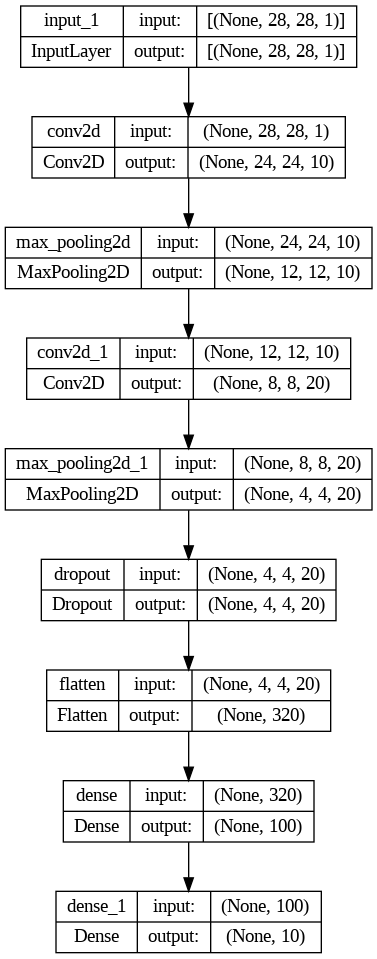

In [4]:
# Show neural network
model.summary()
# Draw Graph
tf.keras.utils.plot_model(model,'model.png',show_shapes=True)

In [5]:
# Compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [6]:
# Training model
# Data đầu vào 60000
# epochs = số lần học , epochos = 10 ; 10(lần)x64(nhóm nhỏ)
# batch_size = khối lượng học, 64 nhóm nhỏ (48000/64 = 750 image) 
# Total image fro training = 10 x 750 = 7500 imgae -> chưa phải toàn bộ data
# validation_split= 20% ktra bước(12000 image), 80% training (48000 image)
# verbose = 1 hiển thị tất cả các bước training

history = model.fit(X_train,Y_train,epochs=10,batch_size=64,verbose=1,validation_split=0.2)
score = model.evaluate(X_test,Y_test, verbose=2)
print("loss = ",score[0])
print('accuracy = ',score)

Epoch 1/10
750/750 [==============================] - 19s 5ms/step - loss: 0.3093 - accuracy: 0.9037 - val_loss: 0.0815 - val_accuracy: 0.9768
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0991 - accuracy: 0.9694 - val_loss: 0.0627 - val_accuracy: 0.9818
Epoch 3/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0732 - accuracy: 0.9765 - val_loss: 0.0527 - val_accuracy: 0.9839
Epoch 4/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0587 - accuracy: 0.9815 - val_loss: 0.0453 - val_accuracy: 0.9868
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0516 - accuracy: 0.9839 - val_loss: 0.0401 - val_accuracy: 0.9886
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0470 - accuracy: 0.9850 - val_loss: 0.0379 - val_accuracy: 0.9898
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0420 - accuracy: 0.9860 - val_loss: 0.0381 - val_accuracy: 0.9885
Epoch

In [7]:
# Test
# số 1 ở trước là 1 tấm ảnh
x = tf.ones((1,28,28,1))
model.predict(x)

1/1 [==============================] - 0s 147ms/step


array([[0.12449346, 0.24232945, 0.05775783, 0.05929733, 0.07887644,
        0.03886241, 0.1052101 , 0.07899533, 0.13390899, 0.08026864]],
      dtype=float32)